In [1]:
from playing import *
import time

In [5]:
%time

num_trials = 3000
Ls = range(8,13,2)
ps = np.linspace(0.02, 0.04, 7)
log_errors_all_L = []
for L in Ls:
    print("Simulating L={}...".format(L))
    Hx = toric_code_x_stabilisers(L)
    logX = toric_code_x_logicals(L)
    log_errors = []
    for p in ps:
        num_errors = num_decoding_failures_noisy_syndromes(Hx, logX, p, p, num_trials, L)
        log_errors.append(num_errors/num_trials)
    log_errors_all_L.append(np.array(log_errors))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.05 µs
Simulating L=8...
Simulating L=10...
Simulating L=12...


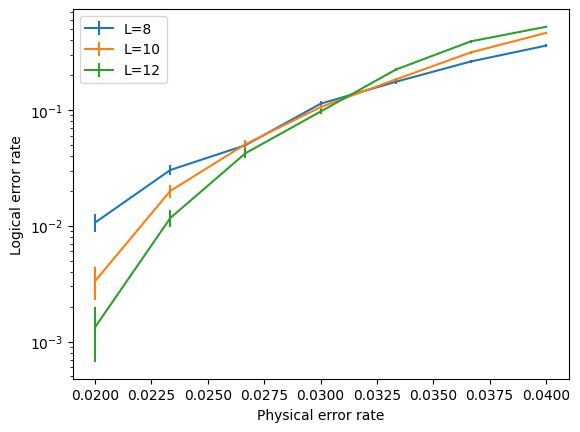

In [3]:
%matplotlib inline

plt.figure()
for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_trials)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="L={}".format(L))
plt.yscale("log")
plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")
plt.legend(loc=0);